In [1]:
import pandas as pd
import numpy as np
from pandas import json_normalize
import json

In [2]:
dfBatch1 = pd.read_csv('MTDataBatch1\MTDataBatch1.rpt', delimiter='|')

In [3]:
def input_process(df):
    
    # delete inconsistent rows with title values
    df = df.loc[df['Id'].astype(str).str.isnumeric()]
        
    # load 'Data' from json
    json_data = df['Data'].apply(json.loads)
    df_data = pd.json_normalize(json_data)

    
    # drop origial 'Data' and join with json data
    df = df.drop('Data', axis = 1)
    df = pd.concat([df.reset_index(drop=True), df_data], axis=1)
    df['DeviceId'] = df['DeviceId'].astype(str)
    return df

In [4]:
df = input_process(dfBatch1)

In [5]:
df.loc[1684079]

Id                                                   195391320
CreatedAt                   2021-11-22 02:04:57.8307232 +00:00
UpdatedAt                   2021-11-22 02:04:57.9257593 +00:00
DeviceId                                       015262001276442
State                                                        1
timeStamp                                 2021-11-22T02:04:17Z
event                                    [{'type': 'stopped'}]
sensors.battery.extpower                                 False
sensors.battery.temp                                      27.2
sensors.battery.percent                                   22.3
sensors.battery.solarmv                                   2091
sensors.battery.current                                    -43
sensors.battery.voltage                                   3456
sensors.battery.solarma                                     67
sensors.battery.charging                                 False
location.bearing                                       

In [6]:
display(df)

,Id,CreatedAt,UpdatedAt,DeviceId,State,timeStamp,event,sensors.battery.extpower,sensors.battery.temp,sensors.battery.percent,...,location.altitude,location.longitude,location.numSats,location.source,location.latitude,location.speed,location.accuracy,sensors.accelerometer.y,sensors.accelerometer.x,sensors.accelerometer.z
0,10046,2021-04-20 17:18:57.3601057 +00:00,2021-04-20 17:18:57.4751133 +00:00,015262001277846,1,2021-04-20T17:18:26Z,[{'type': 'moving'}],False,15.8,72.4,...,65.583,151.218047,11.0,gps,-33.960585,198,4.049,NaN,NaN,NaN
1,10049,2021-04-20 17:18:57.9206698 +00:00,2021-04-20 17:18:58.0006530 +00:00,015262001277846,1,2021-04-20T17:17:52Z,[{'type': 'moving'}],False,15.9,72.3,...,30.239,151.218558,15.0,gps,-33.959840,0,2.830,81.0,-956.0,16.0
2,15189,2021-04-20 17:30:00.0973275 +00:00,2021-04-20 17:30:00.1973672 +00:00,015262001277846,1,2021-04-20T17:27:29Z,[{'type': 'moving'}],False,16.6,72.4,...,9.031,151.215553,14.0,gps,-33.964218,73,3.880,NaN,NaN,NaN
3,15190,2021-04-20 17:30:00.5204188 +00:00,2021-04-20 17:30:00.6554035 +00:00,015262001277846,1,2021-04-20T17:28:29Z,[{'type': 'moving'}],False,16.7,72.4,...,16.769,151.214650,16.0,gps,-33.964371,101,5.310,NaN,NaN,NaN
4,15191,2021-04-20 17:30:00.6604193 +00:00,2021-04-20 17:30:00.7254268 +00:00,015262001277846,1,2021-04-20T17:21:30Z,[{'type': 'moving'}],False,16.0,72.4,...,49.246,151.218837,13.0,gps,-33.964238,173,17.071,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684078,195389569,2021-11-22 02:02:07.3194074 +00:00,2021-11-22 02:02:07.4609948 +00:00,015262001276442,1,2021-11-22T02:01:23Z,[{'type': 'moving'}],False,26.3,22.4,...,323.936,147.579510,10.0,gps,-34.884994,1,19.844,NaN,NaN,NaN
1684079,195391320,2021-11-22 02:04:57.8307232 +00:00,2021-11-22 02:04:57.9257593 +00:00,015262001276442,1,2021-11-22T02:04:17Z,[{'type': 'stopped'}],False,27.2,22.3,...,323.110,147.579400,12.0,gps,-34.884552,0,2.599,0.0,-1002.0,4.0
1684080,196545125,2021-11-23 02:05:44.6179891 +00:00,2021-11-23 02:05:44.7707739 +00:00,015262001276442,1,2021-11-23T02:05:02Z,[{'type': 'stopped'}],False,32.8,22.6,...,323.110,147.579400,12.0,gps,-34.884552,0,2.599,NaN,NaN,NaN
1684081,197957676,2021-11-24 02:06:18.7314233 +00:00,2021-11-24 02:06:18.8826478 +00:00,015262001276442,1,2021-11-24T02:05:36Z,[{'type': 'moving'}],False,24.8,21.7,...,311.423,147.582815,14.0,gps,-34.873479,3,3.057,NaN,NaN,NaN


In [7]:
normalizedEvent = json_normalize(df['event'], record_path = None)
normalizedEvent = json_normalize(normalizedEvent[0])

In [8]:
df['event'] = normalizedEvent['type']
display(df)

,Id,CreatedAt,UpdatedAt,DeviceId,State,timeStamp,event,sensors.battery.extpower,sensors.battery.temp,sensors.battery.percent,...,location.altitude,location.longitude,location.numSats,location.source,location.latitude,location.speed,location.accuracy,sensors.accelerometer.y,sensors.accelerometer.x,sensors.accelerometer.z
0,10046,2021-04-20 17:18:57.3601057 +00:00,2021-04-20 17:18:57.4751133 +00:00,015262001277846,1,2021-04-20T17:18:26Z,moving,False,15.8,72.4,...,65.583,151.218047,11.0,gps,-33.960585,198,4.049,NaN,NaN,NaN
1,10049,2021-04-20 17:18:57.9206698 +00:00,2021-04-20 17:18:58.0006530 +00:00,015262001277846,1,2021-04-20T17:17:52Z,moving,False,15.9,72.3,...,30.239,151.218558,15.0,gps,-33.959840,0,2.830,81.0,-956.0,16.0
2,15189,2021-04-20 17:30:00.0973275 +00:00,2021-04-20 17:30:00.1973672 +00:00,015262001277846,1,2021-04-20T17:27:29Z,moving,False,16.6,72.4,...,9.031,151.215553,14.0,gps,-33.964218,73,3.880,NaN,NaN,NaN
3,15190,2021-04-20 17:30:00.5204188 +00:00,2021-04-20 17:30:00.6554035 +00:00,015262001277846,1,2021-04-20T17:28:29Z,moving,False,16.7,72.4,...,16.769,151.214650,16.0,gps,-33.964371,101,5.310,NaN,NaN,NaN
4,15191,2021-04-20 17:30:00.6604193 +00:00,2021-04-20 17:30:00.7254268 +00:00,015262001277846,1,2021-04-20T17:21:30Z,moving,False,16.0,72.4,...,49.246,151.218837,13.0,gps,-33.964238,173,17.071,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684078,195389569,2021-11-22 02:02:07.3194074 +00:00,2021-11-22 02:02:07.4609948 +00:00,015262001276442,1,2021-11-22T02:01:23Z,moving,False,26.3,22.4,...,323.936,147.579510,10.0,gps,-34.884994,1,19.844,NaN,NaN,NaN
1684079,195391320,2021-11-22 02:04:57.8307232 +00:00,2021-11-22 02:04:57.9257593 +00:00,015262001276442,1,2021-11-22T02:04:17Z,stopped,False,27.2,22.3,...,323.110,147.579400,12.0,gps,-34.884552,0,2.599,0.0,-1002.0,4.0
1684080,196545125,2021-11-23 02:05:44.6179891 +00:00,2021-11-23 02:05:44.7707739 +00:00,015262001276442,1,2021-11-23T02:05:02Z,stopped,False,32.8,22.6,...,323.110,147.579400,12.0,gps,-34.884552,0,2.599,NaN,NaN,NaN
1684081,197957676,2021-11-24 02:06:18.7314233 +00:00,2021-11-24 02:06:18.8826478 +00:00,015262001276442,1,2021-11-24T02:05:36Z,moving,False,24.8,21.7,...,311.423,147.582815,14.0,gps,-34.873479,3,3.057,NaN,NaN,NaN


In [9]:
batch1 = df
display(batch1)

,Id,CreatedAt,UpdatedAt,DeviceId,State,timeStamp,event,sensors.battery.extpower,sensors.battery.temp,sensors.battery.percent,...,location.altitude,location.longitude,location.numSats,location.source,location.latitude,location.speed,location.accuracy,sensors.accelerometer.y,sensors.accelerometer.x,sensors.accelerometer.z
0,10046,2021-04-20 17:18:57.3601057 +00:00,2021-04-20 17:18:57.4751133 +00:00,015262001277846,1,2021-04-20T17:18:26Z,moving,False,15.8,72.4,...,65.583,151.218047,11.0,gps,-33.960585,198,4.049,NaN,NaN,NaN
1,10049,2021-04-20 17:18:57.9206698 +00:00,2021-04-20 17:18:58.0006530 +00:00,015262001277846,1,2021-04-20T17:17:52Z,moving,False,15.9,72.3,...,30.239,151.218558,15.0,gps,-33.959840,0,2.830,81.0,-956.0,16.0
2,15189,2021-04-20 17:30:00.0973275 +00:00,2021-04-20 17:30:00.1973672 +00:00,015262001277846,1,2021-04-20T17:27:29Z,moving,False,16.6,72.4,...,9.031,151.215553,14.0,gps,-33.964218,73,3.880,NaN,NaN,NaN
3,15190,2021-04-20 17:30:00.5204188 +00:00,2021-04-20 17:30:00.6554035 +00:00,015262001277846,1,2021-04-20T17:28:29Z,moving,False,16.7,72.4,...,16.769,151.214650,16.0,gps,-33.964371,101,5.310,NaN,NaN,NaN
4,15191,2021-04-20 17:30:00.6604193 +00:00,2021-04-20 17:30:00.7254268 +00:00,015262001277846,1,2021-04-20T17:21:30Z,moving,False,16.0,72.4,...,49.246,151.218837,13.0,gps,-33.964238,173,17.071,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684078,195389569,2021-11-22 02:02:07.3194074 +00:00,2021-11-22 02:02:07.4609948 +00:00,015262001276442,1,2021-11-22T02:01:23Z,moving,False,26.3,22.4,...,323.936,147.579510,10.0,gps,-34.884994,1,19.844,NaN,NaN,NaN
1684079,195391320,2021-11-22 02:04:57.8307232 +00:00,2021-11-22 02:04:57.9257593 +00:00,015262001276442,1,2021-11-22T02:04:17Z,stopped,False,27.2,22.3,...,323.110,147.579400,12.0,gps,-34.884552,0,2.599,0.0,-1002.0,4.0
1684080,196545125,2021-11-23 02:05:44.6179891 +00:00,2021-11-23 02:05:44.7707739 +00:00,015262001276442,1,2021-11-23T02:05:02Z,stopped,False,32.8,22.6,...,323.110,147.579400,12.0,gps,-34.884552,0,2.599,NaN,NaN,NaN
1684081,197957676,2021-11-24 02:06:18.7314233 +00:00,2021-11-24 02:06:18.8826478 +00:00,015262001276442,1,2021-11-24T02:05:36Z,moving,False,24.8,21.7,...,311.423,147.582815,14.0,gps,-34.873479,3,3.057,NaN,NaN,NaN


In [10]:
from datetime import datetime
import pytz
def extract_timestamp_column(df):
        timestamp = datetime.strptime(df, "%Y-%m-%dT%H:%M:%S%z")
        timestamp = timestamp.astimezone(pytz.timezone("Australia/Sydney"))
        return timestamp

In [11]:
def get_power_diff(row):
    if row['solar_power'] == 0:
        return 0
    else:
        return row['solar_power'] - row['battery_power']

In [12]:
batch1 = batch1.assign(time=batch1['timeStamp'].apply(extract_timestamp_column))
batch1 = batch1.assign(solar_power=(batch1['sensors.battery.solarmv']/1000.0)*(batch1['sensors.battery.solarma']/1000.0))
batch1 = batch1.assign(battery_power=(batch1['sensors.battery.voltage']/1000.0)*(batch1['sensors.battery.current']/1000.0))
batch1['power_difference'] = batch1.apply(get_power_diff, axis=1)

In [13]:
print(pd.isna(batch1['sensors.battery.percent']).sum())

0


In [14]:
batch1.dtypes

Id                                                    object
CreatedAt                                             object
UpdatedAt                                             object
DeviceId                                              object
State                                                 object
timeStamp                                             object
event                                                 object
sensors.battery.extpower                                bool
sensors.battery.temp                                 float64
sensors.battery.percent                              float64
sensors.battery.solarmv                                int64
sensors.battery.current                                int64
sensors.battery.voltage                                int64
sensors.battery.solarma                                int64
sensors.battery.charging                                bool
location.bearing                                     float64
location.floor          

In [15]:
batch1.set_index('time',inplace=True)

In [16]:
# groupByDeviceIdAndTimeIndex = batch1.set_index(['DeviceId','time'])

In [17]:
# groupByDeviceIdAndTimeIndex

In [18]:
# Why does D work, but H give NaN?  How often are devices sampled?
groupedByDeviceId = batch1.groupby('DeviceId').resample('D')

In [19]:
batch1Average = groupedByDeviceId[['sensors.battery.percent','solar_power','battery_power','power_difference','sensors.battery.temp','location.bearing','location.altitude','location.accuracy']].mean()

In [20]:
batch1Average = batch1Average.rename(columns={'location.altitude':'Location Altitude','location.accuracy': 'Accuracy of Location'})

In [21]:
batch1Average = batch1Average.rename(columns={'sensors.battery.percent':'battery_percent','sensors.battery.temp':'battery_temperature','location.bearing':'Location Bearing'})

In [22]:
display(batch1Average)

battery_percent  solar_power  \
DeviceId        time                                                      
015262001090339 2021-06-11 00:00:00+10:00        65.725000     0.001370   
                2021-06-12 00:00:00+10:00        72.250000     0.000000   
                2021-06-13 00:00:00+10:00        71.766667     0.000000   
                2021-06-14 00:00:00+10:00        71.350000     0.000000   
                2021-06-15 00:00:00+10:00        71.000000     0.000000   
...                                                    ...          ...   
015262001281806 2021-11-07 00:00:00+11:00        28.200000     0.071760   
                2021-11-08 00:00:00+11:00        27.900000     0.164715   
                2021-11-09 00:00:00+11:00        27.900000     0.027504   
                2021-11-10 00:00:00+11:00        27.450000     0.037305   
                2021-11-11 00:00:00+11:00        27.050000     0.035526   

                                           battery_power  power_difference  \
DeviceId        time                                                         
015262001090339 2021-06-11 00:00:00+10:00       1.290302         -1.032506   
                2021-06-12 00:00:00+10:00      -0.159204          0.000000   
                2021-06-13 00:00:00+10:00      -0.171103          0.000000   
                2021-06-14 00:00:00+10:00      -0.158309          0.000000   
                2021-06-15 00:00:00+10:00      -0.151239          0.000000   
...                                                  ...               ...   
015262001281806 2021-11-07 00:00:00+11:00      -0.153889          0.225649   
                2021-11-08 00:00:00+11:00      -0.160770          0.325485   
                2021-11-09 00:00:00+11:00      -0.146790          0.174294   
                2021-11-10 00:00:00+11:00      -0.165871          0.203176   
                2021-11-11 00:00:00+11:00      -0.125626          0.161152   

                                           battery_temperature  \
DeviceId        time                                             
015262001090339 2021-06-11 00:00:00+10:00            26.075000   
                2021-06-12 00:00:00+10:00            19.933333   
                2021-06-13 00:00:00+10:00            19.183333   
                2021-06-14 00:00:00+10:00            19.766667   
                2021-06-15 00:00:00+10:00            20.666667   
...                                                        ...   
015262001281806 2021-11-07 00:00:00+11:00            26.200000   
                2021-11-08 00:00:00+11:00            25.300000   
                2021-11-09 00:00:00+11:00            18.900000   
                2021-11-10 00:00:00+11:00            19.200000   
                2021-11-11 00:00:00+11:00            22.200000   

                                           Location Bearing  \
DeviceId        time                                          
015262001090339 2021-06-11 00:00:00+10:00          0.000000   
                2021-06-12 00:00:00+10:00          0.000000   
                2021-06-13 00:00:00+10:00          0.000000   
                2021-06-14 00:00:00+10:00          0.000000   
                2021-06-15 00:00:00+10:00          0.000000   
...                                                     ...   
015262001281806 2021-11-07 00:00:00+11:00        140.249085   
                2021-11-08 00:00:00+11:00          0.000000   
                2021-11-09 00:00:00+11:00          0.000000   
                2021-11-10 00:00:00+11:00          0.000000   
                2021-11-11 00:00:00+11:00          0.000000   

                                           Location Altitude  \
DeviceId        time                                           
015262001090339 2021-06-11 00:00:00+10:00           96.47075   
                2021-06-12 00:00:00+10:00           96.79850   
                2021-06-13 00:00:00+10:00           96.03700   
                2021-06-14 00:00:00+10:00           9

In [35]:
set(batch1Average.index.get_level_values('DeviceId'))

{'015262001090339',
 '015262001105328',
 '015262001228161',
 '015262001249910',
 '015262001258648',
 '015262001261600',
 '015262001261642',
 '015262001265908',
 '015262001268480',
 '015262001268894',
 '015262001274207',
 '015262001274561',
 '015262001275022',
 '015262001275139',
 '015262001275493',
 '015262001276244',
 '015262001276418',
 '015262001276434',
 '015262001276442',
 '015262001276475',
 '015262001276483',
 '015262001277440',
 '015262001277507',
 '015262001277556',
 '015262001277564',
 '015262001277846',
 '015262001277994',
 '015262001278075',
 '015262001278133',
 '015262001278315',
 '015262001278323',
 '015262001278372',
 '015262001278422',
 '015262001278513',
 '015262001281806'}

In [23]:
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='time'>

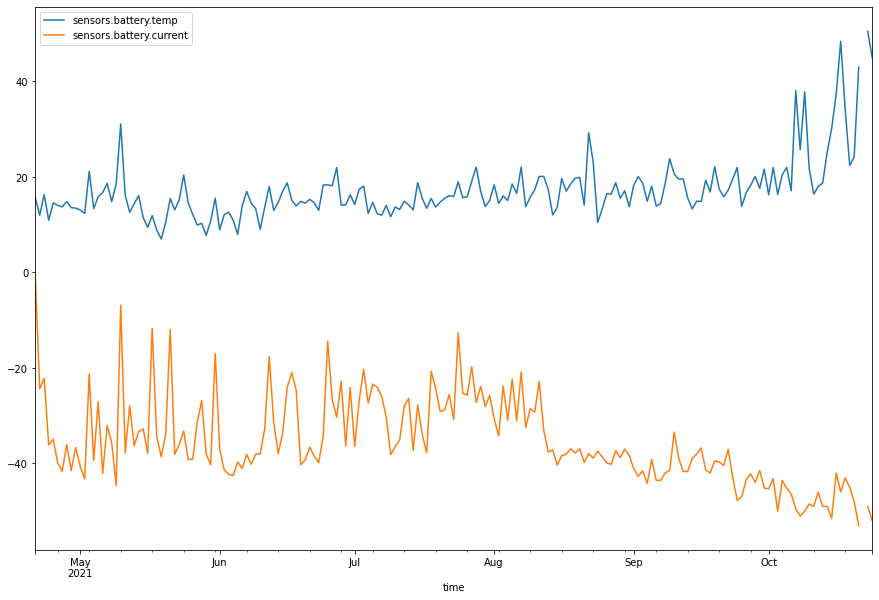

In [50]:
groupedByDeviceId.mean().loc['015262001249910'].plot(y=['sensors.battery.temp','sensors.battery.current'],figsize=(15,10))

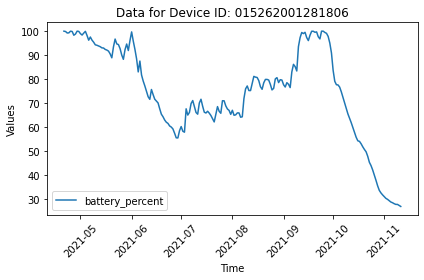

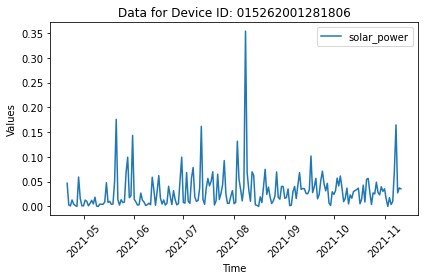

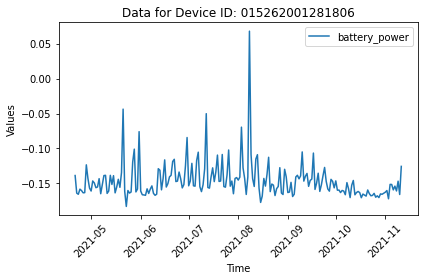

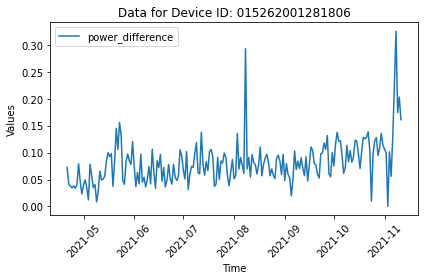

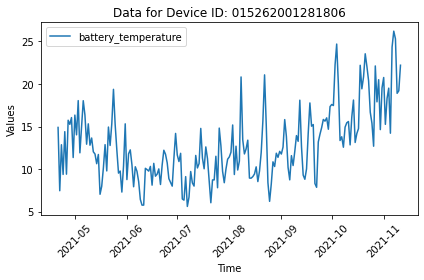

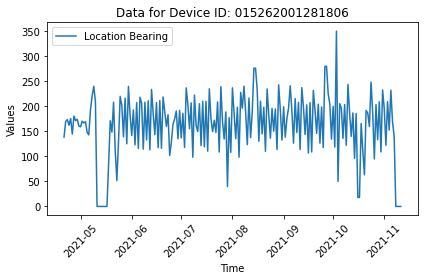

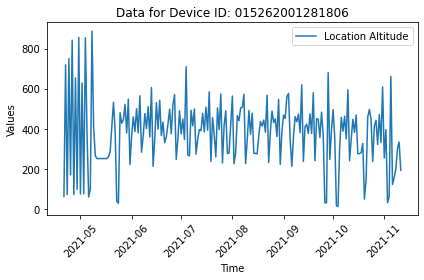

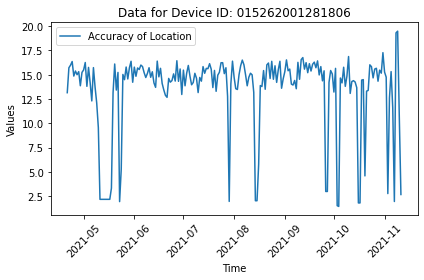

In [23]:
for column in batch1Average.loc['015262001281806'].columns:
    plt.plot(batch1Average.loc['015262001281806'].index.get_level_values('time'),batch1Average.loc['015262001281806'][column], label = column)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title('Data for Device ID: 015262001281806')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    plt.show()

In [28]:
deviceId = '015262001090339'
print(batch1Average.loc[deviceId].columns)
# for column in batch1Average.loc[deviceId].columns:
#     plt.plot(batch1Average.loc[deviceId].index.get_level_values('time'),batch1Average.loc[deviceId][column], label = column)
#     plt.xlabel('Time')
#     plt.ylabel('Values')
#     plt.title('Data for Device ID: '+deviceId)
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.tight_layout()

#     plt.show()

Index(['battery_percent', 'solar_power', 'battery_power', 'power_difference',
       'battery_temperature', 'Location Bearing', 'Location Altitude',
       'Accuracy of Location'],
      dtype='object')


In [25]:
# Get all Device Ids
for deviceId in set(batch1Average.index.get_level_values('DeviceId')):
#     plt.plot(batch1Average.loc[deviceId].index.get_level_values('time'),batch1Average.loc[deviceId]['solar_power'], label = 'solar_power')
#     plt.xlabel('Time')
#     plt.ylabel('Values')
#     plt.title('Data for Device ID: '+deviceId)
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.tight_layout()

#     plt.show()
    print(deviceId)

015262001249910
015262001277440
015262001261600
015262001090339
015262001278315
015262001278372
015262001277846
015262001274207
015262001277564
015262001278133
015262001276418
015262001228161
015262001275022
015262001105328
015262001275493
015262001265908
015262001268480
015262001258648
015262001276442
015262001276475
015262001278075
015262001278513
015262001276483
015262001275139
015262001281806
015262001278422
015262001274561
015262001268894
015262001261642
015262001276244
015262001277556
015262001278323
015262001276434
015262001277507
015262001277994


In [27]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt